Como se va a realizar la preparación completa de los datos nuevamente se subirá el dataset original sin modificaciones.

In [91]:
# Importar las librerías
import pandas as pd

import numpy as np

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['font.size'] = 4
matplotlib.rcParams['figure.dpi'] = 100

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# No muestra warnings
import warnings
warnings.filterwarnings("ignore")


In [92]:
file_path = "https://raw.githubusercontent.com/Jcamgom/DatasetHotel/refs/heads/main/hotel_bookings.csv"
df = pd.read_csv(file_path, sep=';',  na_values='?')

In [93]:
df.shape

(119390, 32)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [95]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,1/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,1/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,3/07/2015


In [96]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96,0,0,Check-Out,6/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225,0,2,Check-Out,7/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,158,0,4,Check-Out,7/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104,0,0,Check-Out,7/09/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151,0,2,Check-Out,7/09/2017


## Eliminacion de columnas que no se van a usar

In [97]:
proporcion_nulos = df['company'].isnull().mean()
print(f"Proporción de valores nulos en 'company': {proporcion_nulos}")

Proporción de valores nulos en 'company': 0.943068933746545


In [98]:
# Eliminar la columna 'company' si más del 50% de sus valores son nulos
if df['company'].isnull().mean() > 0.5:
    df = df.drop('company', axis=1)

In [99]:
# Eliminamos las coulumnas que no usamos y que ademas son object

df = df.drop(columns=(['arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'meal', 'country', 'reserved_room_type', 'assigned_room_type', 'agent', 'reservation_status',
    'reservation_status_date']))

# 3.1 one hot encoding

Lo que hace one hot encoding es crear una columna por cada valor diferente en la columna original, en este caso, usando la columna "hotel" creara dos nuevas columnas, una para city hotel y otra para resort hotel.

Cada observación (fila) tendra un unico 1 en estas dos columnas, indicando de que hotel es, por ejemplo, si la fila 1 tiene un 1 en la columna "city_hotel", esto indica que este hotel es city.

In [143]:
df_dum = pd.get_dummies(df, columns=['hotel', 'deposit_type', 'customer_type', 'market_segment',
    'distribution_channel','arrival_date_month'], prefix=['hotel_es','deposit_type_es', 'customer_type', 'market_segment',
    'distribution_channel','arrival_date_month', ])
df_dum.dtypes

,0
is_canceled,int64
lead_time,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64
children,float64
babies,int64
is_repeated_guest,int64
previous_cancellations,int64
previous_bookings_not_canceled,int64


In [144]:
df_dum.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False


In [158]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   adults                          119390 non-null  int64  
 5   children                        119386 non-null  float64
 6   babies                          119390 non-null  int64  
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  days_in_waiting_list            119390 non-null  int64  
 12  adr             

In [157]:
df_dum.corr()['is_canceled'].nlargest(50)

,is_canceled
is_canceled,1.000000
deposit_type_es_Non Refund,0.481457
lead_time,0.293123
market_segment_Groups,0.221859
distribution_channel_TA/TO,0.175944
hotel_es_City Hotel,0.136531
customer_type_Transient,0.133084
previous_cancellations,0.110133
adults,0.060017
days_in_waiting_list,0.054186


In [156]:
print(df_dum.columns)

Index(['is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_es_City Hotel',
       'hotel_es_Resort Hotel', 'deposit_type_es_No Deposit',
       'deposit_type_es_Non Refund', 'deposit_type_es_Refundable',
       'customer_type_Contract', 'customer_type_Group',
       'customer_type_Transient', 'customer_type_Transient-Party',
       'market_segment_Aviation', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline TA/TO',
       'market_segment_Online TA', 'market_segment_Undefined',
       'distribution_channel_Corporate', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel

#Normalizacion

(119390, 49)
         is_canceled      lead_time  stays_in_weekend_nights  \
count  119390.000000  119390.000000            119390.000000   
mean        0.370416     104.011416                 0.927599   
std         0.482918     106.863097                 0.998613   
min         0.000000       0.000000                 0.000000   
25%         0.000000      18.000000                 0.000000   
50%         0.000000      69.000000                 1.000000   
75%         1.000000     160.000000                 2.000000   
max         1.000000     737.000000                19.000000   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
std                1.908286       0.579261       0.398561       0.097436   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000   

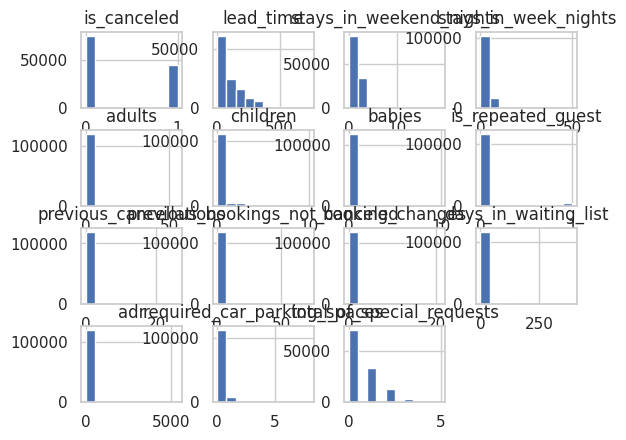

In [151]:
# resumir la forma del conjunto de datos
print(df_dum.shape)
# resumir cada variable
print(df_dum.describe())

# histogramas de las variables
df_dum.hist()
pyplot.show()

#Conclusiones
Se deciden eliminar estas columnas: 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'reserved_room_type', 'assigned_room_type', 'agent', 'reservation_status','reservation_status_date', 'company', puesto que no se estaban usando para analisis y eran tipo object.
Para el dataset seleccionado solo se puede usar el OneHotEncoding puesto que las variables son nominales y no hay ninguna ordinal o muy extensa como para usar el LabelEncoding.